<a href="https://colab.research.google.com/github/Micheline-code/pos-ciencia-de-dados-analytics-sprint-2/blob/main/MVP_Analise_de_Dados_e_Boas_Praticas_MICHELINE_4052024001925.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Micheline Carvalho Barroso Pereira

**Matrícula:** 4052024001925

**Dataset:** [Personality](https://raw.githubusercontent.com/Micheline-code/pos-ciencia-de-dados-analytics-sprint-2/main/personality_dataset.csv)

# Descrição do Problema

O conjunto de dados "Personality" é um conjunto de dados multivalorado, composto por características relacionadas ao comportamento social e aos traços de personalidade, que foi projetado para explorar e classificar indivíduos como **Extrovertidos** ou **Introvertidos**.

## Hipóteses do Problema

1) As pessoas extrovertidas passam pouco tempo sozinhas?

2) A sociabilidade digital elevada está associada à extroversão?

3) As pessoas introvertidas tendem a manter círculos sociais mais restritos?

4) Pessoas que não têm medo de falar em público têm mais chance de serem extrovertidas?

5) As pessoas introvertidas têm menor propensão a atividades externas ou eventos sociais?

6) Pessoas que se sentem esgotadas após socializar têm mais chance de serem introvertidas?

Qual a combinação de fatores que mais prediz se uma pessoa é extrovertida?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características, o objetivo é prever qual o perfil comportamental (Extrovertido ou Introvertido) de uma determinada pessoa.

## Seleção de Dados

O conjunto de dados "Personality" está disponível na plataforma Kaggle (https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data). Todos os seus atributos, com exceção da variável alvo, possuem valores ausentes (nulos) e existe uma pequena diferença entre as classes no que diz respeito à quantidade de amostras, o que torna o conjunto de dados interessante para práticas de análise exploratória e de pré-processamento.

## Atributos do Conjunto de Dados

O conjunto de dados contém 2.900 amostras e possui 8 atributos:

- **Time_spent_Alone:**
Número médio de horas que o indivíduo passa sozinho por dia (0 - 11).

- **Stage_fear:**
Indica se o indivíduo apresenta medo de falar ou se apresentar em público (Yes/No).

- **Social_event_attendance:**
Frequência com que o indivíduo participa de eventos sociais (0 - 10).

- **Going_outside:**
Frequência com que o indivíduo sai de casa (0 - 7).

- **Drained_after_socializing:**
Indica se o indivíduo se sente mentalmente ou fisicamente esgotado após interações sociais (Yes/No).

- **Friends_circle_size:**
Número de amigos próximos do indivíduo (0 - 15).

- **Post_frequency:**
Frequência de postagens em redes sociais (0 - 10).

- **Personality (variável alvo):**
Classificação do indivíduo (Extrovert/Introvert).

# **1) Importação de Bibliotecas**

Consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Personality.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
#from sklearn.decomposition import PCA
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline


# **2) Carga de Dados**

Obtém os dados a partir de uma URL em um repositório público do GitHub e exibe as primeiras e as últimas linhas.

In [2]:
# URL do CSV (personality_dataset.csv, também disponível na plataforma Kaggle)
url = "https://raw.githubusercontent.com/Micheline-code/pos-ciencia-de-dados-analytics-sprint-2/main/personality_dataset.csv"

# Carrega o dataset
df = pd.read_csv(url)

In [3]:
# Visualiza as primeiras linhas
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
# Visualiza as últimas linhas
df.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert
2899,3.0,No,6.0,6.0,No,6.0,9.0,Extrovert


# **3) Análise de Dados**

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Personality, visamos entender as características das variáveis, sua distribuição e relações, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## 3.1) Total e Tipo das Instâncias

O dataset Personality possui 2.900 instâncias (amostras) e 8 atributos. Os atributos de tipo numérico (float64) são: *Time_spent_Alone, Social_event_attendance, Going_outside, Friends_circle_size, Post_frequency*. Os atributos de tipo categórico (object) são: *Stage_fear, Drained_after_socializing, Personality*.

In [5]:
# Mostra as dimensões do dataset
df.shape

(2900, 8)

In [6]:
# Calcula total de linhas
total = len(df)

# Mostra a quantidade de valores não nulos e o tipo de dado por coluna
print(f"Total de instâncias: {total}")
print("\nTipos de dados por coluna:")

print(df.info())

Total de instâncias: 2900

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None


## 3.2) Análise de Nulos

A análise de nulos serve para garantir a qualidade e a consistência dos dados, prevenindo falhas ou distorções nas atividades de análise, pré-processamento e modelagem.

In [7]:
# Mostra a quantidade e o percentual de valores nulos por coluna
nulos = df.isnull().sum().to_frame(name='Nulos')
nulos['% Nulos'] = (nulos['Nulos'] / total * 100).round(2)

print(nulos)

                           Nulos  % Nulos
Time_spent_Alone              63     2.17
Stage_fear                    73     2.52
Social_event_attendance       62     2.14
Going_outside                 66     2.28
Drained_after_socializing     52     1.79
Friends_circle_size           77     2.66
Post_frequency                65     2.24
Personality                    0     0.00


<Axes: >

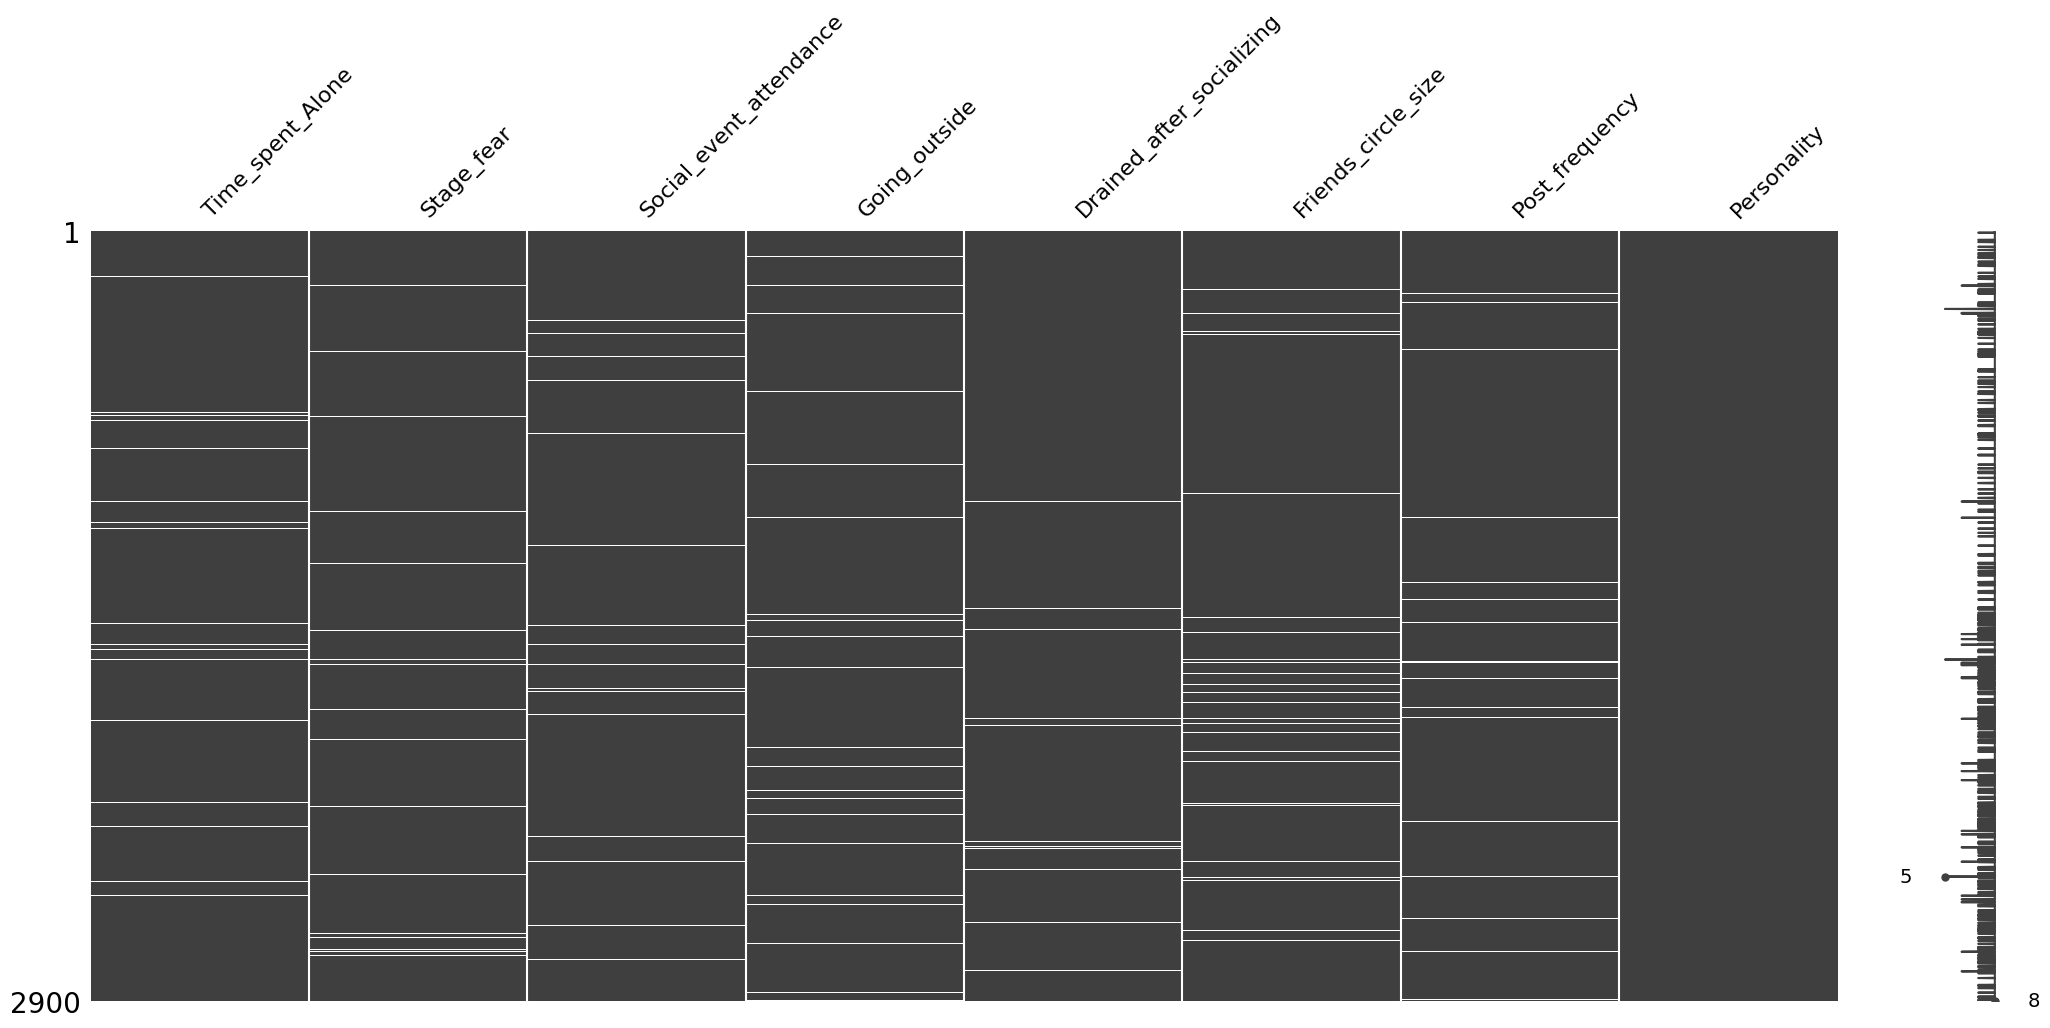

In [8]:
# Exibe visualização matricial da nulidade do dataset original
ms.matrix(df)

In [9]:
# Remove linhas com valores nulos (neste momento, é criado um novo dataset sem nulos)
df_sem_nulos = df.dropna(how='any')

# Mostra a quantidade de linhas sem nulos
df_sem_nulos.count()

,0
Time_spent_Alone,2477
Stage_fear,2477
Social_event_attendance,2477
Going_outside,2477
Drained_after_socializing,2477
Friends_circle_size,2477
Post_frequency,2477
Personality,2477


<Axes: >

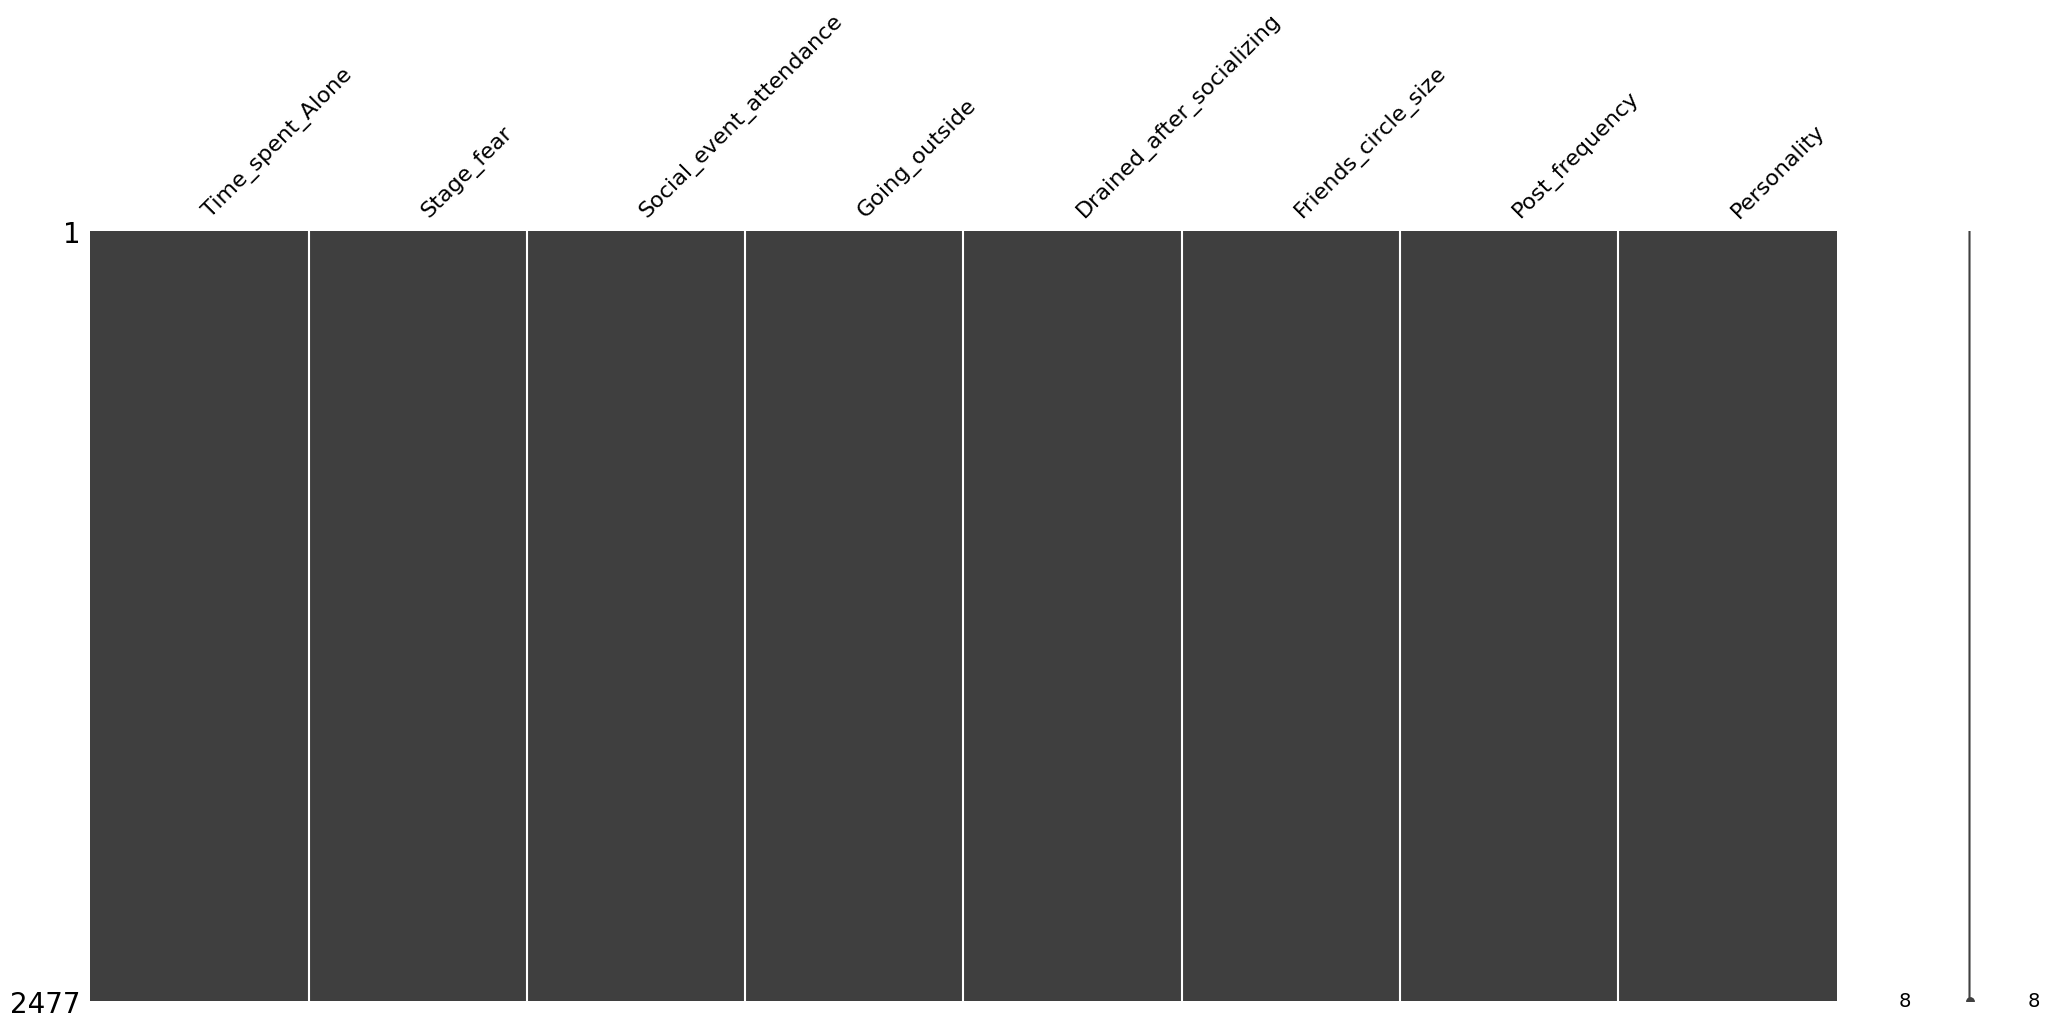

In [10]:
# Exibe visualização matricial da nulidade do dataset que foi transformado (sem nulos)
ms.matrix(df_sem_nulos)

In [11]:
# Calcula e imprime a diferença e a proporção de nulos
diferenca_nulos = len(df) - len(df_sem_nulos)
proporcao_nulos= round((diferenca_nulos/2900 * 100),2)

print(f'Diferença entre dataset original e dataset sem nulos: {diferenca_nulos} linhas')

print(f'Proporção de  nulos: {proporcao_nulos}%')

Diferença entre dataset original e dataset sem nulos: 423 linhas
Proporção de  nulos: 14.59%


Para o dataset Personality, observamos que, a nível de coluna, as proporções de nulos são baixas e estão entre 1,79% a 2,66% (menor que 5%). A variável alvo *Personality* não possui valores nulos.

Ao removermos todas as linhas com algum valor nulo, chegamos a um dataset com 2.477 linhas, ou seja, 85,4% do original (2.900 linhas). Considerando que todas as colunas são importantes para a classificação da personalidade dos indivíduos e como a proporção de linhas com nulos é de 14,6% (proporção média, de 5% a 20%), a conclusão dessa análise é de que os nulos devem ser tratados na etapa de pré-processamento.

Ressaltamos que o dataset (dataframe) sem nulos, criado nessa seção, serviu apenas para essa análise e não será considerado nas próximas etapas desse estudo.

## 3.3) Análise de Balanceamento

A análise de balanceamento tem como objetivo verificar se as classes de uma variável categórica — especialmente a variável alvo em problemas de classificação — estão distribuídas de forma equilibrada no dataset. Essa verificação é fundamental para evitar vieses, escolher melhores estratégias de desenvolvimento e de medição, além de contribuir para o desempenho dos modelos.

In [12]:
# Contagem absoluta de cada classe
contagem = df['Personality'].value_counts()

# Proporção relativa (em percentual) de cada classe
proporcao = df['Personality'].value_counts(normalize=True) * 100

# Combina em um único DataFrame
resultado = pd.DataFrame({
    'Contagem': contagem,
    'Proporção (%)': proporcao.round(2)
})

print(resultado)

             Contagem  Proporção (%)
Personality                         
Extrovert        1491          51.41
Introvert        1409          48.59


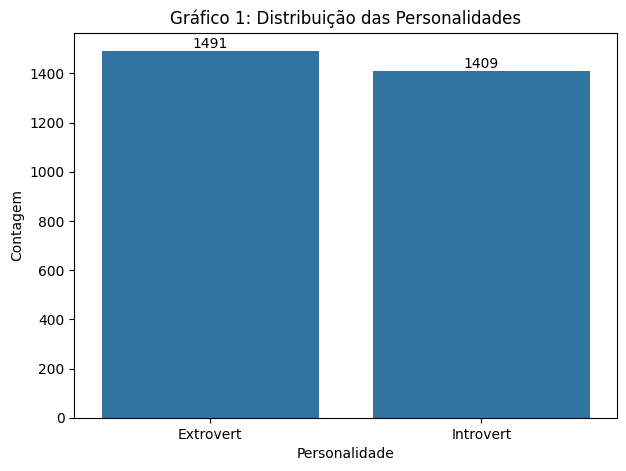

In [13]:
# Mostra graficamente quantidade de instâncias por classe
plt.figure(figsize=(7, 5))

# Gráfico de barras simples para mostrar quantidade de amostras por classe
ax = sns.countplot(x='Personality', data=df)
plt.title('Gráfico 1: Distribuição das Personalidades')
plt.xlabel('Personalidade')
plt.ylabel('Contagem')

# Adiciona os rótulos de contagem em cima das barras
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, altura + 0.5, int(altura),
            ha='center', va='bottom')

plt.show()

O **gráfico 1** mostra que a classe **Extrovert** possui algumas dezenas de amostras a mais que a classe **Introvert**. A diferença entre as classes é de aproximadamente 2,82%, o que não caracteriza um desequilíbrio significativo. Portanto, nenhuma ação de balanceamento será necessária para esse estudo.

## 3.4) Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis. Para as características cateagóricas, vamos calcular frequência absoluta e frequência relativa.

In [14]:
# Gera estatísticas descritivas básicas para variáveis numéricas do dataset
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


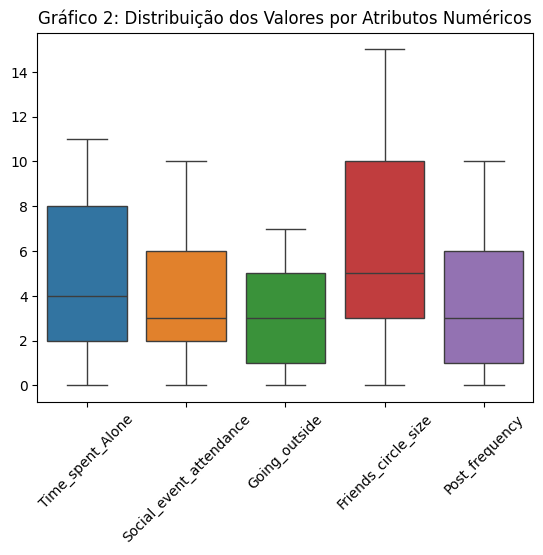

In [15]:
# Exibe boxplot para dataset completo com Seaborn (variáveis numéricas)
grafico = sns.boxplot(data = df, showfliers=True)
grafico.set_title('Gráfico 2: Distribuição dos Valores por Atributos Numéricos')
plt.xticks(rotation = 45)
plt.show()

Nesta etapa, foram realizadas análises estatísticas para as variáveis numéricas, considerando o dataset completo e suas classes (**Extrovert** e **Introvert**).

A partir das estatísticas geradas para o dataset completo e apresentadas no  **gráfico 2**, os principais pontos observados foram:

- *Time_spent_Alone*: Há grande variação no tempo que os indivíduos passam sozinhos. A mediana e a média estão próximas, indicando uma distribuição levemente simétrica. Contudo, a dispersão é alta, sugerindo perfis variados de isolamento social.

- *Social_event_attendance*: A maioria participa ocasionalmente de eventos sociais. A mediana abaixo da média sugere leve assimetria à direita, com alguns indivíduos participando muito mais frequentemente que o restante.

- *Going_outside*: Com mediana igual à média, a distribuição é aproximadamente simétrica. Os dados indicam frequência moderada de sair de casa, com poucos casos extremos.

- *Friends_circle_size*: É a variável mais dispersa. A média consideravelmente maior que a mediana indica forte assimetria à direita, com alguns indivíduos com círculos sociais muito grandes puxando a média para cima.

- *Post_frequency*: A maioria das pessoas posta com baixa ou média frequência. A distribuição também apresenta leve assimetria à direita.

In [16]:
# Gera estatísticas descritivas básicas para variáveis numéricas da classe "Extrovert" do dataset
df[df['Personality'] == 'Extrovert'].describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,1457.000000,1463.000000,1456.000000,1451.000000,1458.000000
mean,2.067261,6.016405,4.634615,9.173673,5.638546
std,2.208781,2.211710,1.593288,3.501944,2.341549
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,4.000000,7.000000,4.000000
50%,2.000000,6.000000,5.000000,9.000000,6.000000
75%,3.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


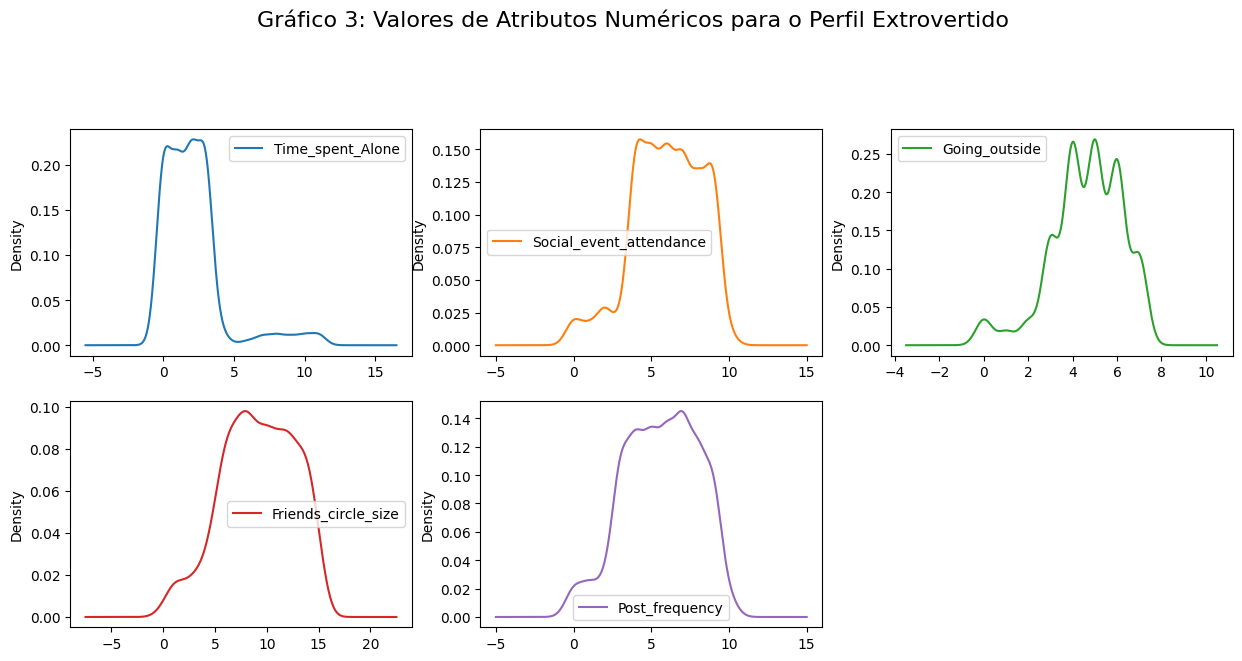

In [17]:
# Gera density plot para classe "Extrovert" do dataset (variáveis numéricas)
df[df['Personality'] == 'Extrovert'].plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.suptitle("Gráfico 3: Valores de Atributos Numéricos para o Perfil Extrovertido", fontsize=16, y=1)
plt.show()

O **gráfico 3** mostra a distribuição de diferentes variáveis numéricas comportamentais entre os participantes classificados como extrovertidos.

- *Time_spent_Alone*: A densidade é concentrada entre os valores 2 e 6, o que indica que indivíduos extrovertidos tendem a passar pouco tempo sozinhos. Esse padrão é consistente com a característica típica de extrovertidos de preferirem interações sociais ao isolamento.

- *Social_event_attendance*: A distribuição apresenta um pico entre os valores 6 e 10, o que demonstra uma alta frequência em eventos sociais entre os extrovertidos. Há poucos casos com baixa frequência, sugerindo que é raro esse grupo evitar atividades sociais.

- *Going_outside*: A distribuição tem múltiplos picos entre os valores 4 e 8, o que sugere uma variação entre os extrovertidos no hábito de sair de casa. Ainda assim, a maior parte apresenta frequência moderada a alta nesse comportamento.

- *Friends_circle_size*: A maior concentração está entre os valores 8 e 12, indicando que extrovertidos geralmente possuem um círculo social grande. A curva se estende até valores mais altos, mostrando que alguns indivíduos desse grupo têm um número ainda maior de amigos.

- *Post_frequency*: A distribuição concentra-se entre os valores 6 e 10, o que indica que muitos extrovertidos têm uma frequência significativa de postagens em redes sociais. Esse comportamento pode estar relacionado à necessidade de expressão e de manter contato com outras pessoas.


In [18]:
# Gera estatísticas descritivas básicas para variáveis numéricas da classe "Introvert" do dataset
df[df['Personality'] == 'Introvert'].describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,1380.000000,1375.000000,1378.000000,1372.000000,1377.000000
mean,7.080435,1.778909,1.272859,3.196793,1.368918
std,2.612803,1.715328,1.377642,2.555706,1.566034
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,1.000000,0.000000
50%,7.000000,2.000000,1.000000,3.000000,1.000000
75%,9.000000,3.000000,2.000000,4.000000,2.000000
max,11.000000,9.000000,7.000000,14.000000,9.000000


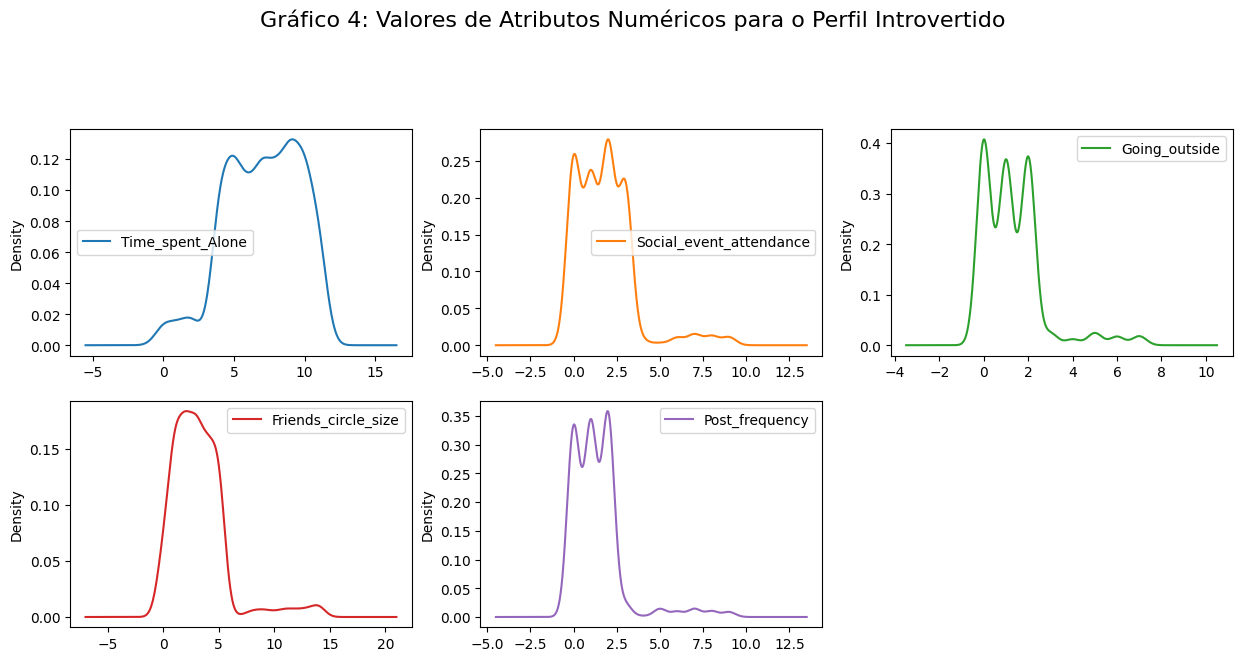

In [19]:
# Gera density plot para classe "Introvert" do dataset (variáveis numéricas)
df[df['Personality'] == 'Introvert'].plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.suptitle("Gráfico 4: Valores de Atributos Numéricos para o Perfil Introvertido", fontsize=16, y=1)
plt.show()

O **gráfico 4** apresenta a distribuição de diferentes variáveis numéricas comportamentais associadas ao perfil introvertido.

1. *Time_spent_Alone*: A distribuição mostra dois picos principais entre 5 e 10 unidades, indicando que indivíduos com perfil introvertido tendem a passar uma quantidade considerável de tempo sozinhos. Este comportamento é compatível com a preferência por atividades individuais e momentos de introspecção.

2. *Social_event_attendance*: A densidade é mais elevada entre 0 e 4 unidades, evidenciando que introvertidos geralmente participam de poucos eventos sociais. A presença de múltiplos picos sugere variações dentro do grupo, mas ainda assim mantendo uma tendência de baixa frequência.

3. *Going_outside*: A maior concentração dos dados está abaixo de 3 unidades, o que reforça o padrão de comportamento mais reservado. Isso sugere que introvertidos têm menor propensão a atividades externas ou ambientes muito sociais.

4. *Friends_circle_size*: Os dados mostram maior densidade entre 2 e 5 unidades, com queda acentuada após esse intervalo. Isso indica que indivíduos introvertidos tendem a manter círculos sociais mais restritos, privilegiando relações mais profundas em detrimento da quantidade.

5. *Post_frequency*: A densidade também se concentra em valores baixos, especialmente entre 0 e 3 unidades. Este padrão está alinhado com uma menor necessidade de exposição ou compartilhamento frequente em ambientes virtuais.

In [20]:
# Frequência absoluta e relativa combinadas para variáveis categóricas da classe "Extrovert" do dataset
df_extrovertido = df[df['Personality'] == 'Extrovert']

frequencia = df_extrovertido['Stage_fear'].value_counts()
proporcao = df_extrovertido['Stage_fear'].value_counts(normalize=True).round(2)

tabela = pd.DataFrame({
    'Frequência Absoluta': frequencia,
    'Frequência Relativa (%)': (proporcao * 100).astype(str) + '%'
})

print(tabela)

frequencia = df_extrovertido['Drained_after_socializing'].value_counts()
proporcao = df_extrovertido['Drained_after_socializing'].value_counts(normalize=True).round(2)

tabela = pd.DataFrame({
    'Frequência Absoluta': frequencia,
    'Frequência Relativa (%)': (proporcao * 100).astype(str) + '%'
})

print(tabela)

            Frequência Absoluta Frequência Relativa (%)
Stage_fear                                             
No                         1338                   92.0%
Yes                         111                    8.0%
                           Frequência Absoluta Frequência Relativa (%)
Drained_after_socializing                                             
No                                        1362                   92.0%
Yes                                        111                    8.0%


A análise acima mostra que a grande maioria das pessoas extrovertidas (92%) não têm medo de falar em público, nem se sentem esgotadas após contato social.

In [21]:
# Frequência absoluta e relativa combinadas para variáveis categóricas da classe "Introvert" do dataset
df_introvertido = df[df['Personality'] == 'Introvert']

frequencia = df_introvertido['Stage_fear'].value_counts()
proporcao = df_introvertido['Stage_fear'].value_counts(normalize=True).round(2)

tabela = pd.DataFrame({
    'Frequência Absoluta': frequencia,
    'Frequência Relativa (%)': (proporcao * 100).astype(str) + '%'
})

print(tabela)

frequencia = df_introvertido['Drained_after_socializing'].value_counts()
proporcao = df_introvertido['Drained_after_socializing'].value_counts(normalize=True).round(2)

tabela = pd.DataFrame({
    'Frequência Absoluta': frequencia,
    'Frequência Relativa (%)': (proporcao * 100).astype(str) + '%'
})

print(tabela)

            Frequência Absoluta Frequência Relativa (%)
Stage_fear                                             
Yes                        1299                   94.0%
No                           79                    6.0%
                           Frequência Absoluta Frequência Relativa (%)
Drained_after_socializing                                             
Yes                                       1296                   94.0%
No                                          79                    6.0%


A análise acima mostra que a grande maioria das pessoas introvertidas (94%) têm medo de falar em público, e sentem-se esgotadas após contato social.

## 3.5) Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.



In [22]:
# Calcula correlação de Pearson
correlacoes_numericos = df.corr(method='pearson', numeric_only=True)

correlacoes_numericos

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.733011,-0.750760,-0.717185,-0.732649
Social_event_attendance,-0.733011,1.000000,0.747756,0.734795,0.744615
Going_outside,-0.750760,0.747756,1.000000,0.736390,0.770819
Friends_circle_size,-0.717185,0.734795,0.736390,1.000000,0.707888
Post_frequency,-0.732649,0.744615,0.770819,0.707888,1.000000


Text(0.5, 1.0, 'Matriz 1: Matriz de Correlação entre Atributos Numéricos')

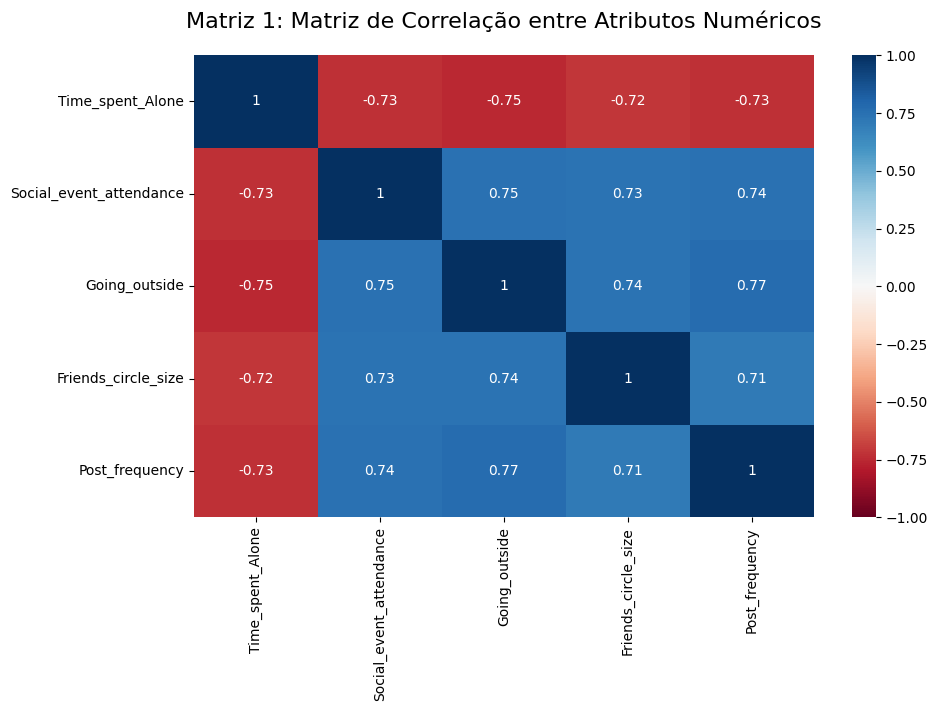

In [23]:
# Gera Matriz de Correlação com valores numéricos
plt.figure(figsize = (10,6))
sns.heatmap(correlacoes_numericos, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title("Matriz 1: Matriz de Correlação entre Atributos Numéricos", fontsize=16, pad=20)

A matriz de correlação apresentada (**matriz 1**) permite observar relações importantes entre diferentes aspectos do comportamento social dos indivíduos. Foram analisadas cinco variáveis: tempo gasto sozinho (Time_spent_Alone), frequência em eventos sociais (Social_event_attendance), frequência em sair de casa (Going_outside), tamanho do círculo social (Friends_circle_size) e frequência de postagens (Post_frequency).

Os resultados indicam que quanto maior o tempo que a pessoa passa sozinha, menor é sua participação em atividades sociais, menor é seu círculo de amizades e menor sua frequência de postagens. Isso sugere um padrão comportamental de isolamento social.

Os resultados também mostram que indivíduos que saem de casa com frequência também tendem a participar de mais eventos sociais, possuem um círculo social maior e publicam mais frequentemente. Este padrão é indicativo de um estilo de vida socialmente ativo e conectado.


# **4) Pré-Processamento de Dados**

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

## 4.1) Criar Conjuntos de Treinamento e de Teste

Separar o dataset em treinamento e teste é uma das etapas fundamentais do processo de modelagem em machine learning. Essa separação permite avaliar a capacidade real do modelo de generalizar para dados desconhecidos.

In [24]:
# Separa features (X) e target (y)
x = df
y = df['Personality']

In [25]:
# Divide os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
# Mostra dimensões dos conjuntos de dados criados para treinamento e teste
print(f"Dimensões de x_train: {x_train.shape}")
print(f"Dimensões de x_test: {x_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de x_train: (2320, 8)
Dimensões de x_test: (580, 8)
Dimensões de y_train: (2320,)
Dimensões de y_test: (580,)


## 4.2) Tratamento de Valores Nulos

Conforme reportado na seção 3.2 (Análise de Nulos), nesta etapa, será realizado o tratamento de valores nulos. Como os dados numéricos têm comportamentos distintos por classe (**Extrovert** e **Introvert**), decidiu-se substituir o valor nulo pela média do atributo por classe.

Para os atributos categóricos, será gravado o valor "Desconhecido", independente da classe.

Para evitar vazamento de dados (data leakage), os nulos serão tratados no conjunto de treinamento. Em seguida, os nulos serão tratados no conjunto de teste. A média, utilizada para substituir os nulos em campos numéricos, será calculada com base nos dados de treinamento e servirá tanto para o tratamento dos nulos de treinamento, quanto de teste.


In [28]:
# TRATAMENTO DE NULOS PARA ATRIBUTOS CATEGÓRICOS DO CONJUNTO DE TREINAMENTO: Substituição de nulos por "Desconhecido"

# Inicialmente, imprime a quantidade de nulos existentes nas variáveis categóricas do conjunto de treinamento
print("\n\n\nValores nulos:\n", x_train[['Stage_fear', 'Drained_after_socializing']] .isnull().sum())

# Substitui valores nulos nas colunas 'Stage_fear' e 'Drained_after_socializing' por 'Desconhecido' no conjunto de treinamento
x_train[['Stage_fear', 'Drained_after_socializing']] = x_train[['Stage_fear', 'Drained_after_socializing']].fillna('Desconhecido')

# Valida o resultado do tratamento de nulos no conjunto de treinamento
print("\n\n\nResultado:\n", x_train[['Stage_fear', 'Drained_after_socializing']] .isnull().sum())

# Imprime o conjunto de treinamento
print (f'\n\n\n {x_train}')





Valores nulos:
 Stage_fear                   58
Drained_after_socializing    40
dtype: int64



Resultado:
 Stage_fear                   0
Drained_after_socializing    0
dtype: int64



       Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
399                0.0         No                      7.0            7.0   
2895               3.0         No                      7.0            6.0   
2023               0.0         No                      6.0            6.0   
2613               3.0         No                      4.0            6.0   
2689               5.0        Yes                      0.0            1.0   
...                ...        ...                      ...            ...   
1007               0.0         No                      5.0            5.0   
2686              11.0        Yes                      1.0            2.0   
1690               7.0        Yes                      2.0            0.0   
731               10.0        Yes       

In [29]:
# TRATAMENTO DE NULOS PARA ATRIBUTOS CATEGÓRICOS DO CONJUNTO DE TESTE: Substituição de nulos por "Desconhecido"

# Inicialmente, imprime a quantidade de nulos existentes nas variáveis categóricas do conjunto de teste
print("\n\n\nValores nulos:\n", x_test[['Stage_fear', 'Drained_after_socializing']] .isnull().sum())

# Substitui valores nulos nas colunas 'Stage_fear' e 'Drained_after_socializing' por 'Desconhecido' no conjunto de teste
x_test[['Stage_fear', 'Drained_after_socializing']] = x_test[['Stage_fear', 'Drained_after_socializing']].fillna('Desconhecido')

# Valida o resultado do tratamento de nulos no conjunto de teste
print("\n\n\nResultado:\n", x_test[['Stage_fear', 'Drained_after_socializing']] .isnull().sum())

# Imprime o conjunto de teste
print (f'\n\n\n {x_test}')





Valores nulos:
 Stage_fear                   15
Drained_after_socializing    12
dtype: int64



Resultado:
 Stage_fear                   0
Drained_after_socializing    0
dtype: int64



       Time_spent_Alone    Stage_fear  Social_event_attendance  Going_outside  \
440                0.0            No                      6.0            6.0   
2692               1.0            No                      7.0            5.0   
225                6.0  Desconhecido                      0.0            2.0   
328                2.0            No                      4.0            6.0   
1259               3.0            No                      4.0            6.0   
...                ...           ...                      ...            ...   
410                5.0           Yes                      1.0            0.0   
1410               7.0           Yes                      1.0            1.0   
1845               1.0            No                      6.0            5.0   
2667      

In [30]:
# TRATAMENTO DE NULOS PARA ATRIBUTOS NUMÉRICOS DO CONJUNTO DE TREINAMENTO: Substituição de nulos por médias calculadas por classe (Extrovert e Introvert) para conjunto de treinamento

# Inicialmente, imprime a quantidade de nulos existentes nas variáveis numéricas do conjunto de treinamento
print("\n\n\nValores nulos:\n", x_train[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']].isnull().sum())

# Seleciona colunas numéricas
atributos_numericos = x_train.select_dtypes(include='number').columns.tolist()

# Calcula a média por classe para os atributos numéricos
medias_por_classe = x_train.groupby('Personality')[atributos_numericos].mean()

# Substitui os nulos pela média da classe correspondente
for atributo in atributos_numericos:
    x_train[atributo] = x_train[atributo].fillna(x_train['Personality'].map(medias_por_classe[atributo]))

# Remove a coluna da classe
x_train = x_train.drop('Personality', axis=1)

# Valida o resultado do tratamento de nulos no conjunto de treinamento
print("\n\n\nValores nulos:\n", x_train[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']].isnull().sum())

print (f'\n\n\n {x_train}')





Valores nulos:
 Time_spent_Alone           52
Social_event_attendance    45
Going_outside              54
Friends_circle_size        62
Post_frequency             50
dtype: int64



Valores nulos:
 Time_spent_Alone           0
Social_event_attendance    0
Going_outside              0
Friends_circle_size        0
Post_frequency             0
dtype: int64



       Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
399                0.0         No                 7.000000            7.0   
2895               3.0         No                 7.000000            6.0   
2023               0.0         No                 6.000000            6.0   
2613               3.0         No                 4.000000            6.0   
2689               5.0        Yes                 0.000000            1.0   
...                ...        ...                      ...            ...   
1007               0.0         No                 5.000000            5.0   
2686              11.

In [31]:
# TRATAMENTO DE NULOS PARA ATRIBUTOS NUMÉRICOS DO CONJUNTO DE TESTE: Substituição de nulos por médias calculadas por classe (Extrovert e Introvert) para conjunto de treinamento

# Inicialmente, imprime a quantidade de nulos existentes nas variáveis numéricas do conjunto de teste
print("\n\n\nValores nulos:\n", x_test[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']].isnull().sum())

# Seleciona colunas numéricas
atributos_numericos = x_test.select_dtypes(include='number').columns.tolist()

# Substitui os nulos pela média da classe correspondente (calculada no conjunto de treinamento)
for atributo in atributos_numericos:
    x_test[atributo] = x_test[atributo].fillna(x_test['Personality'].map(medias_por_classe[atributo]))

# Remove a coluna da classe
x_test = x_test.drop('Personality', axis=1)

# Valida o resultado do tratamento de nulos no conjunto de teste
print("\n\n\nValores nulos:\n", x_test[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']].isnull().sum())

print (f'\n\n\n {x_test}')





Valores nulos:
 Time_spent_Alone           11
Social_event_attendance    17
Going_outside              12
Friends_circle_size        15
Post_frequency             15
dtype: int64



Valores nulos:
 Time_spent_Alone           0
Social_event_attendance    0
Going_outside              0
Friends_circle_size        0
Post_frequency             0
dtype: int64



       Time_spent_Alone    Stage_fear  Social_event_attendance  Going_outside  \
440                0.0            No                 6.000000            6.0   
2692               1.0            No                 7.000000            5.0   
225                6.0  Desconhecido                 0.000000            2.0   
328                2.0            No                 4.000000            6.0   
1259               3.0            No                 4.000000            6.0   
...                ...           ...                      ...            ...   
410                5.0           Yes                 1.000000            0.0 

## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



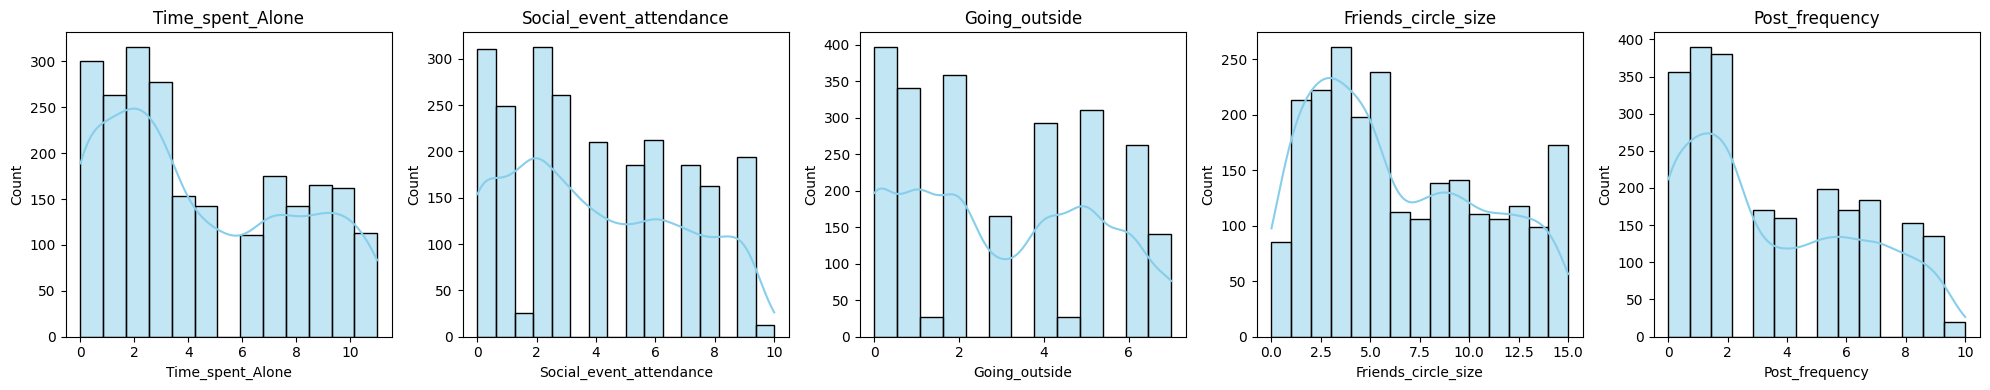

In [97]:
cols = x_train.select_dtypes(include='number').columns

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, col in enumerate(cols):
    sns.histplot(data=x_train, x=col, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [98]:
# Inicializa o MinMaxScaler
scaler_norm = MinMaxScaler()

In [99]:
# Seleciona variáveis numéricas para normalização dos conjuntos de treinamento e teste
x_train_num_vars = x_train.select_dtypes(include='number')
x_test_num_vars = x_test.select_dtypes(include='number')

# Aprende min e max apenas de x_train_num_vars
scaler_norm.fit(x_train_num_vars)
x_train_num_vars_normalized = scaler_norm.transform(x_train_num_vars)

# Aplica normalização ao conjunto x_test_num_vars com métricas aprendidas de x_train_num_vars
x_test_num_vars_normalized = scaler_norm.transform(x_test_num_vars)

In [105]:
# Exibe as primeiras linhas dos dados normalizados
df_train_normalized = pd.DataFrame(x_train_num_vars_normalized, columns=x_train_num_vars.columns)

print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_train_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   Time_spent_Alone  Social_event_attendance  Going_outside  \
0          0.000000                      0.7       1.000000   
1          0.272727                      0.7       0.857143   
2          0.000000                      0.6       0.857143   
3          0.272727                      0.4       0.857143   
4          0.454545                      0.0       0.142857   

   Friends_circle_size  Post_frequency  
0             0.266667        0.600000  
1             0.400000        0.600000  
2             0.733333        0.800000  
3             0.600000        0.565954  
4             0.266667        0.100000  


In [104]:
# Exibir as primeiras linhas dos dados normalizados
df_test_normalized = pd.DataFrame(x_test_num_vars_normalized, columns=x_test_num_vars.columns)

print("\nPrimeiras 5 linhas dos dados normalizados (teste):")
print(df_test_normalized.head())


Primeiras 5 linhas dos dados normalizados (teste):
   Time_spent_Alone  Social_event_attendance  Going_outside  \
0          0.000000                      0.6       0.857143   
1          0.090909                      0.7       0.714286   
2          0.545455                      0.0       0.285714   
3          0.181818                      0.4       0.857143   
4          0.272727                      0.4       0.857143   

   Friends_circle_size  Post_frequency  
0             0.733333             0.5  
1             0.800000             0.3  
2             0.066667             0.2  
3             0.466667             0.3  
4             0.466667             0.8  


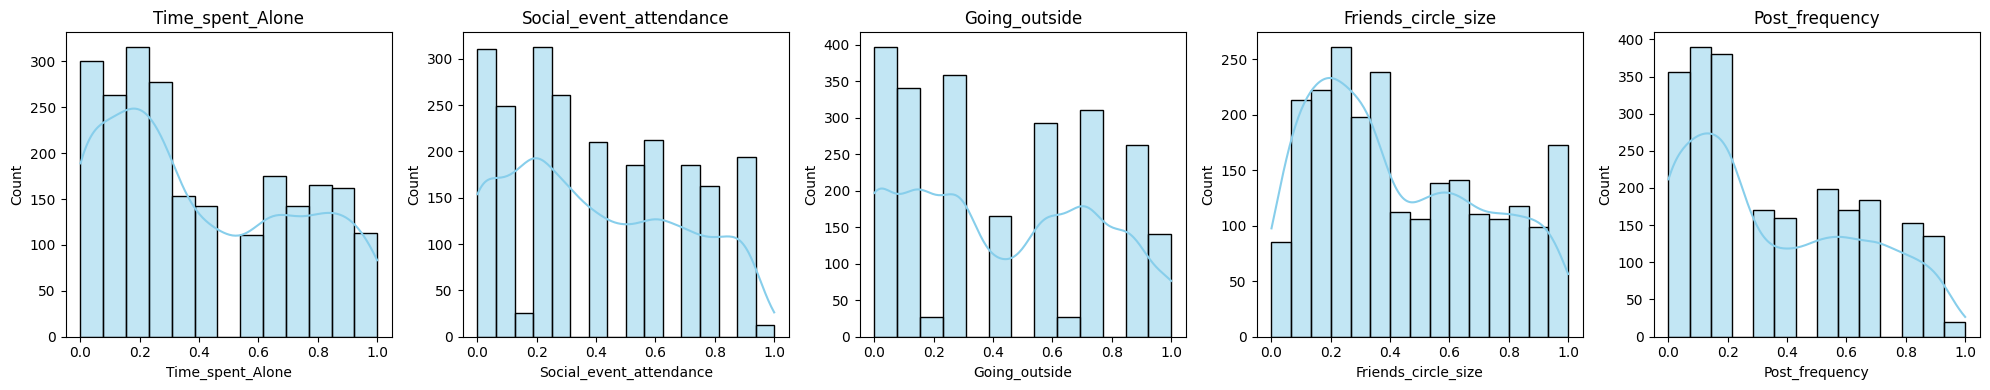

In [108]:
cols_train = df_train_normalized.select_dtypes(include='number').columns

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, col in enumerate(cols_train):
    sns.histplot(data=df_train_normalized, x=col, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

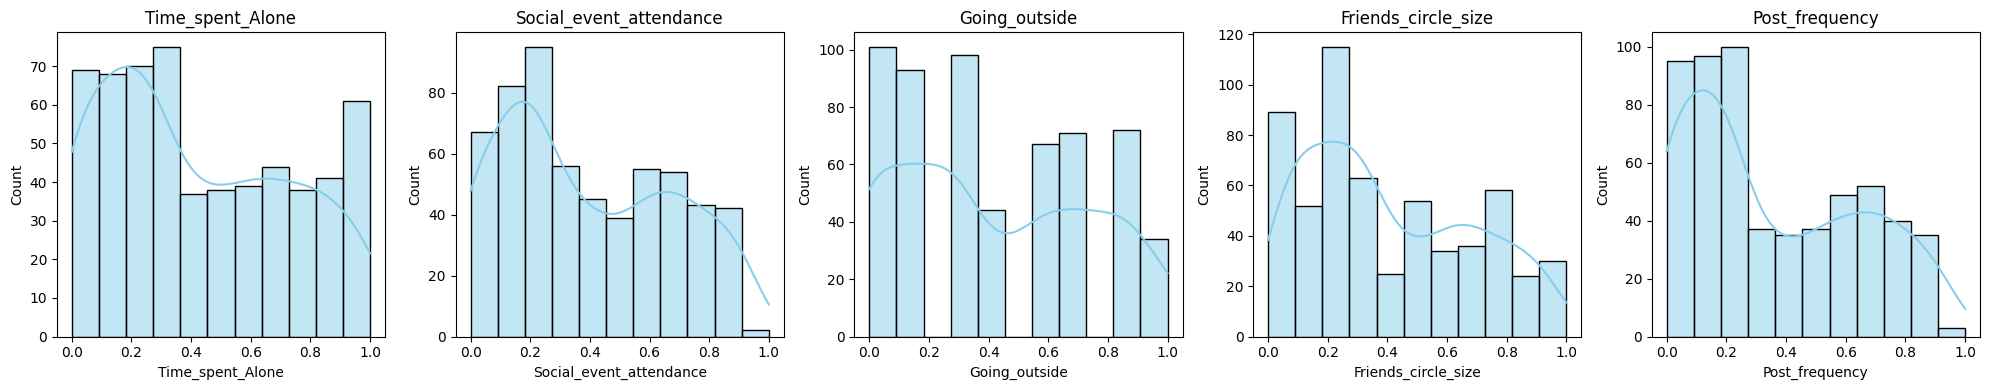

In [109]:
cols_test = df_test_normalized.select_dtypes(include='number').columns

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, col in enumerate(cols_test):
    sns.histplot(data=df_test_normalized, x=col, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [ ]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [67]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

NameError: name 'X_train_standardized' is not defined

In [ ]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900459         -1.220248          -0.441986         -0.136610
1           0.380366         -1.879558           0.402829          0.380294
2          -0.900459          1.636764          -1.286801         -1.170419
3           1.078998          0.318143           1.191323          1.414103
4          -0.201827         -0.560937           0.177545          0.121842


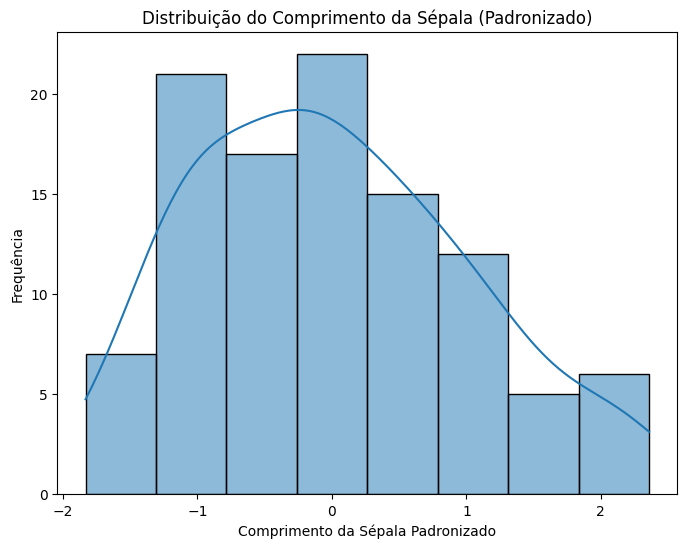

In [ ]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Padronizado)')
plt.xlabel('Comprimento da Sépala Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



# **5) Conclusão**

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.

Os gráficos de densidade revelam padrões compatíveis com o perfil comportamental esperado de pessoas extrovertidas: pouca permanência sozinhas, alta frequência em eventos sociais, sociabilidade digital elevada e uma rede de amizades ampla.

Os dados analisados confirmam características amplamente associadas ao perfil introvertido, como a valorização do tempo sozinho, a participação reduzida em interações sociais e um padrão de comunicação mais discreto, tanto presencial quanto virtual.